In [1]:
import matplotlib.pyplot as plt

In [2]:
def calc_manhattan_distance(x0,y0,x1,y1):
    d = abs(x1-x0) + abs(y1-y0)
    return d

In [3]:
def set_color(p_id, points, belong):
    colormap = ['orange','b','g','c','m','y']
    
    if points[p_id] in belong:
        label = belong[points[p_id]]-1
        return colormap[label]
    else:
        return 'gray'

<ipython-input-4-2f68d67ad8ca>:58: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-4-2f68d67ad8ca>:72: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


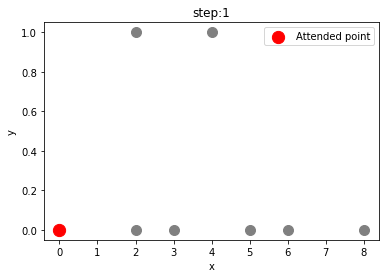

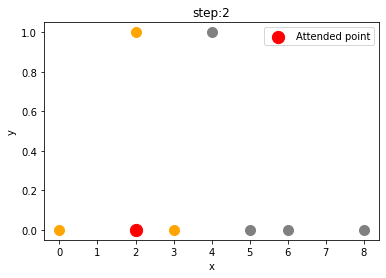

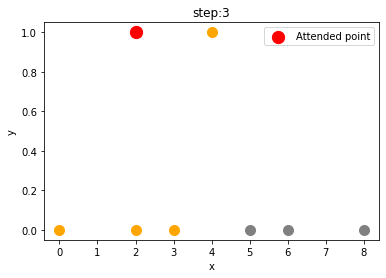

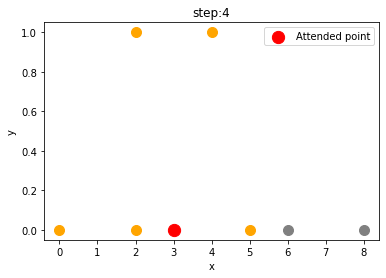

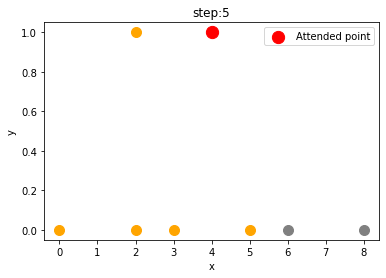

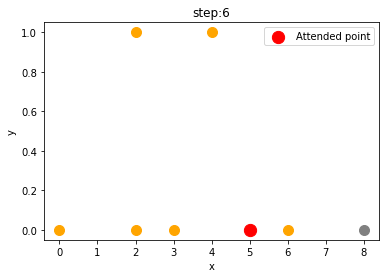

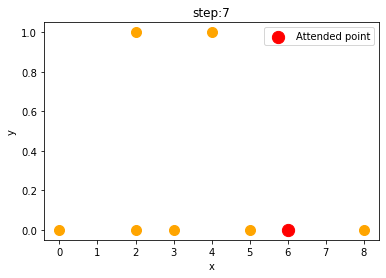

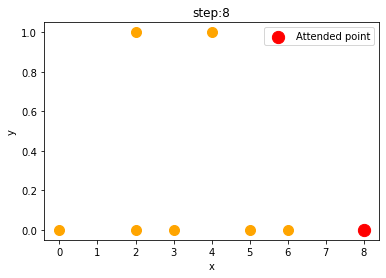

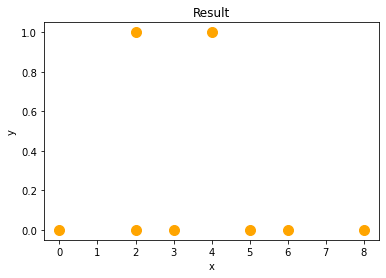

In [4]:
points = ['A','B','C','D','E','F','G','H']
x = [0,2,2,3,4,5,6,8]
y = [0,0,1,0,1,0,0,0]
epsilon = 2
min_pts = 3
belong = {}
new_label = 0

step = 0
for i in range(len(x)):
    # core point: point[i]
    
    step += 1

    # 近傍点には自分自身も含めるので1で初期化
    n_neighborhood = 1

    tmp_neighborhoods = []
    # core pointの近傍を探索
    for j in range(len(x)):
        if i == j:
            continue
        if calc_manhattan_distance(x[i],y[i],x[j],y[j]) <= epsilon:
            n_neighborhood +=1
            tmp_neighborhoods.append(j)
    
    # min_pts個以上近傍点がある場合
    if n_neighborhood >= min_pts:
        # 付与するlabelを取得
        if points[i] in belong:
            label = belong[points[i]]
        else:
            new_label += 1
            label = new_label
        
        # core pointにラベルを付与
        belong[points[i]] = label
        
        # 近傍点にラベルを付与
        for tmp_nbh in tmp_neighborhoods:
            if tmp_nbh not in belong:
                belong[points[tmp_nbh]] = label
    
    # visualize
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for j in range(len(x)):
        if i == j:
            ax.scatter([x[j]], [y[j]], s=150, c='r', label='Attended point')
        else:
            ax.scatter([x[j]], [y[j]], s=100, c=set_color(j,points,belong))
    
    ax.legend()
    ax.set_title('step:{}'.format(step))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    fig.show()
    # fig.savefig('a11/a11-{}.png'.format(step), dpi=300)
    

# visualize result
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in range(len(x)):
    ax.scatter([x[i]], [y[i]], s=100, c=set_color(i,points,belong))

ax.set_title('Result')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.show()
# fig.savefig('a11/a11-result.png', dpi=300)